# Airbnb Analysis And Price Prediction

## Problem Defining


Airbnb is a game-changer in traditional hospitality businesses, providing guests with a more distinctive and personalized option of traveling and experiencing the world. We'd want to explore the pricing listings in the New York City and develop a price prediction for travelers to use when deciding where to stay. In addition, we'd want to dig into the common features of popular listings and make some recommendations to (prospective)/ hosts on how to make their listings popular.



**Data Source**：
> listings: http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/listings.csv.gz </br>
> reviews: http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/reviews.csv.gz

### Libraries And Utilities

In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 350)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zicon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Importation And Assessment

In [17]:
# Import data
listing_data = pd.read_csv('listings.csv')
listing_data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,t,3,33,63,338,2021-12-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,69%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,t,3,6,18,194,2021-12-05,409,32,0,2015-01-05,2021-10-22,4.45,4.58,4.49,4.78,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,...,t,30,60,90,365,2021-12-05,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52


<AxesSubplot:>

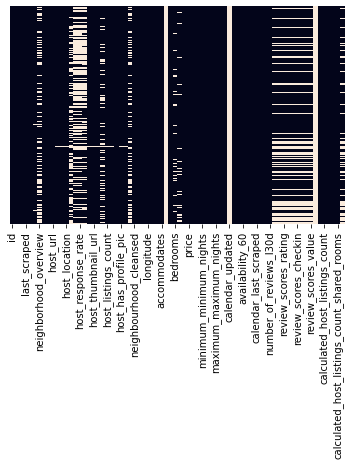

In [18]:
sns.heatmap(listing_data.isnull(),yticklabels=False,cbar=False)

### Apply first level of data clean for EDA

In [19]:
# Remove observation without feature price
listing_data.dropna(subset=['price'],inplace=True)
# Convert feature price into integer
listing_data['price'] = listing_data['price'].str.replace(',', '').str.replace('$', '').astype(float)

## Exploratory Data Analysis

### Numeric Features Distribution Analysis

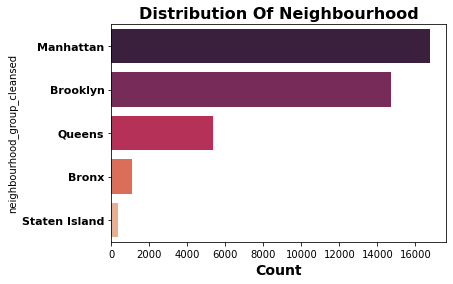

In [20]:
# Distribution of Neighbourhood
neighbourhood = sns.countplot(y=listing_data['neighbourhood_group_cleansed'],
                   order=listing_data['neighbourhood_group_cleansed'].value_counts().index,palette='rocket')
neighbourhood.set_yticklabels(neighbourhood.get_yticklabels(),fontsize=11,fontweight='bold')
neighbourhood.set_title('Distribution Of Neighbourhood',fontsize=16,fontweight='bold')
neighbourhood.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()

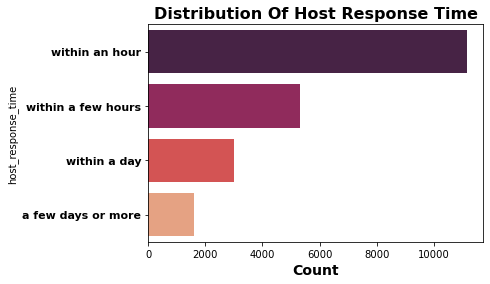

In [21]:
# Distribution Of Host Response Time
host_response_time = sns.countplot(y=listing_data['host_response_time'],
                   order=listing_data['host_response_time'].value_counts().index,palette='rocket')
host_response_time.set_yticklabels(host_response_time.get_yticklabels(),fontsize=11,fontweight='bold')
host_response_time.set_title('Distribution Of Host Response Time',fontsize=16,fontweight='bold')
host_response_time.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()

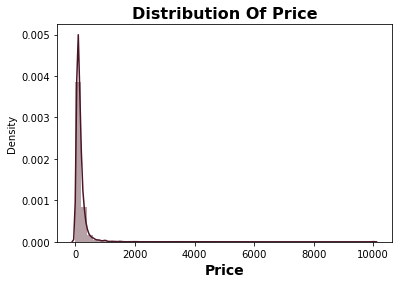

In [22]:
# Distribution Of Price
price = sns.distplot(listing_data['price'], color ='#4a1525')
price.set_title('Distribution Of Price',fontsize=16,fontweight='bold')
price.set_xlabel('Price',fontsize=14,fontweight='bold')
plt.show()

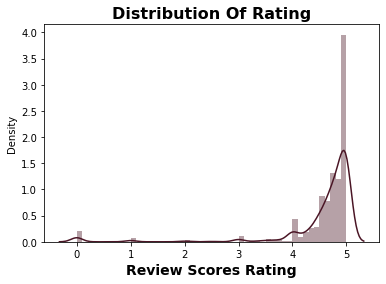

In [23]:
# Distribution Of Review Scores Rating
price = sns.distplot(listing_data['review_scores_rating'], color ='#4a1525')
price.set_title('Distribution Of Rating',fontsize=16,fontweight='bold')
price.set_xlabel('Review Scores Rating',fontsize=14,fontweight='bold')
plt.show()

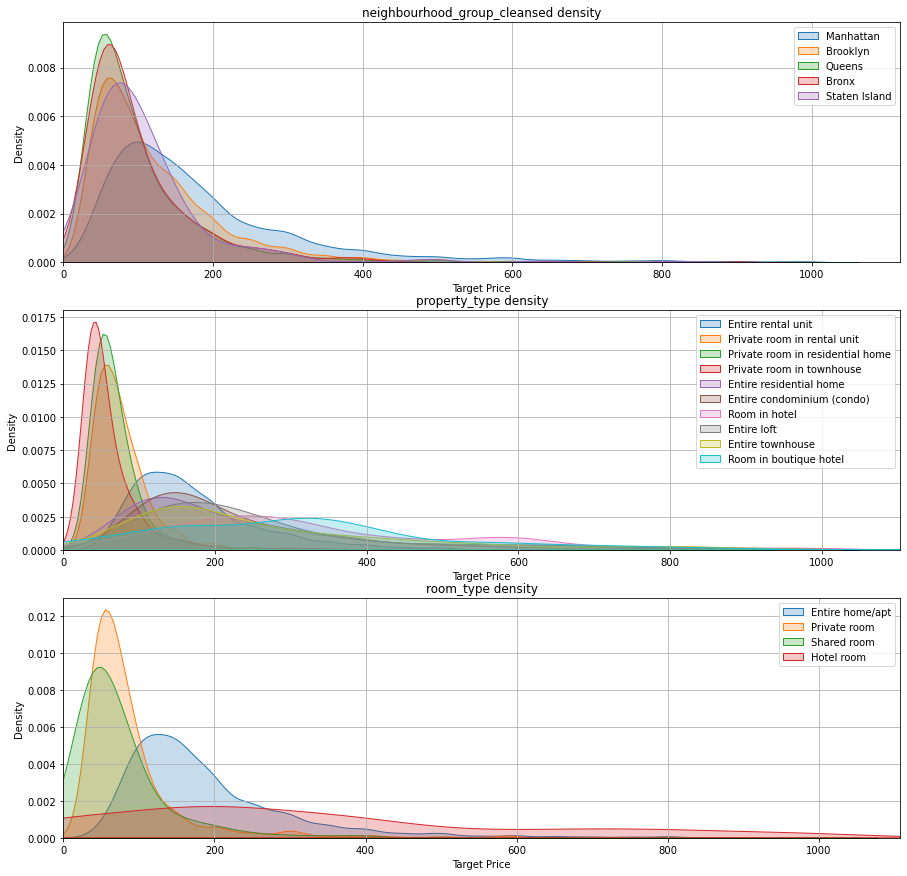

In [24]:
listing_data = listing_data[(listing_data['price']<1000)]

names = list(['neighbourhood_group_cleansed','property_type','room_type'])
fig, axs = plt.subplots(3, 1,figsize=(15,15))

for col in names: 
    ax = axs[names.index(col)]
    count = listing_data[col].value_counts()[:10]
    countdf = pd.DataFrame({'label': list(count.keys()),
                   'count': list(count[:])})
    
    for cat in countdf['label']:
        # subset by category(label)
        subset = listing_data[listing_data[col] == cat]
        # Draw the density plot
        sns.distplot(subset['price'], hist = False, kde = True,label = cat,
                     kde_kws = {'shade': True,'linewidth': 1},ax=ax).set(xlim=(0))
               
        ax.set_xlabel('Target Price')
        ax.set_title(col + ' density')
        ax.grid('on')
        ax.legend()
        #fig.legend(labels=['test_label1','test_label2'])
        #ax.legend(label,countdf['label'], title=column_name)

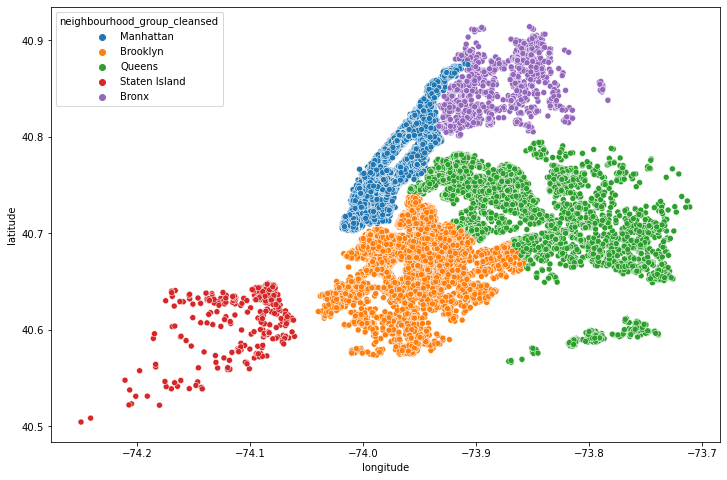

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(listing_data.longitude,listing_data.latitude,hue=listing_data.neighbourhood_group_cleansed)
plt.ioff()

### Text Based Analysis

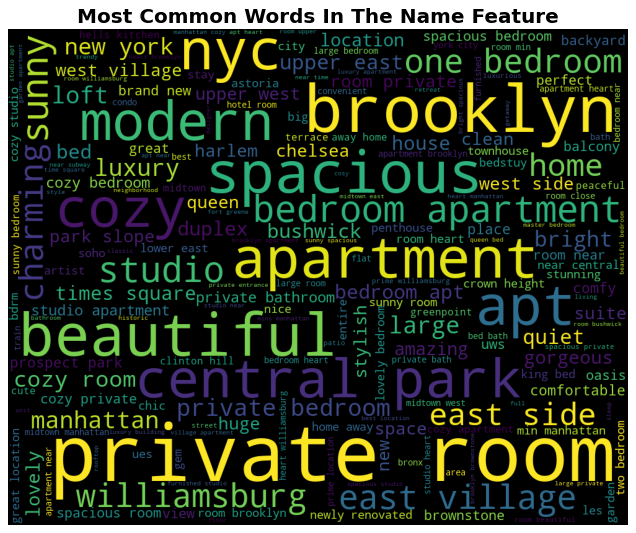

In [26]:
# to lower case
listing_data['name'] = listing_data['name'].str.lower()

# regular expression
regex = re.compile('[^a-z\s]')
# cast everything in column name as string object
listing_data['name'] = listing_data['name'].apply(lambda x: regex.sub('', str(x)))
names = ' '.join(listing_data['name'].values)
names = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", names)
names = re.findall(r'\w+', names)
names = ' '.join([word for word in names if word not in stop_words and len(word) >2])

# Count frequency to show most common words
names_freq_dic = nltk.FreqDist(names.split(' '))
dict(names_freq_dic)


figure(figsize=(10, 10), dpi=80)

plt.imshow(WordCloud(width=1000,height=800,min_font_size=10,stopwords=stop_words).generate(names))
plt.title('Most Common Words In The Name Feature',fontsize=18,fontweight='bold')
plt.axis('off')
plt.show()

### Apply second level of data clean for Regression

In [27]:
# filter out unhelpful columns for regression
listing = listing_data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications','neighbourhood',
       'neighbourhood_cleansed', 'bathrooms', 'amenities', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review',
        'license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_since',
       'host_response_time', 'host_response_rate','host_acceptance_rate'], axis = 1)                 
listing.head(3)

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,f,8.0,8.0,t,t,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,150.0,30,t,3,33,63,338,48,0,0,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,0.33
1,f,1.0,1.0,t,t,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,75.0,1,t,3,6,18,194,409,32,0,4.45,4.58,4.49,4.78,4.80,4.71,4.64,f,4.86
2,f,1.0,1.0,t,t,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,1.0,1.0,60.0,30,t,30,60,90,365,50,0,0,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,0.52


In [28]:
listing.isnull().sum()

host_is_superhost                 34
host_listings_count               34
host_total_listings_count         34
host_has_profile_pic              34
host_identity_verified            34
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                   106
bedrooms                        3948
beds                            2371
price                              0
minimum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating            9306
review_scores_accuracy          9915
review_scores_cleanliness       9904
r

In [29]:
#dataset cleaning

# Remove observation without any information about the host
listing.dropna(subset=['host_is_superhost'],inplace=True)
# Remove observation without any information about the bathrooms
listing.dropna(subset=['bathrooms_text'],inplace=True)

# Extract desire digits from string
listing['bathrooms_text'] = listing['bathrooms_text'].replace('Shared half-bath','0.5 bath')
listing['bathrooms_text'] = listing['bathrooms_text'].replace('Private half-bath','0.5 bath')
listing['bathrooms_text'] = listing['bathrooms_text'].replace('Half-bath','0.5 bath')
listing['bathrooms'] = listing['bathrooms_text'].str.split().str[0].astype(float)
listing.drop('bathrooms_text',axis=1,inplace=True)

# Convert (t,f) into (1,0)
listing['host_is_superhost'] = listing['host_is_superhost'].replace('t',1)
listing['host_is_superhost'] = listing['host_is_superhost'].replace('f',0)
listing['host_has_profile_pic'] = listing['host_has_profile_pic'].replace('t',1)
listing['host_has_profile_pic'] = listing['host_has_profile_pic'].replace('f',0)
listing['host_identity_verified'] = listing['host_identity_verified'].replace('t',1)
listing['host_identity_verified'] = listing['host_identity_verified'].replace('f',0)
listing['has_availability'] = listing['has_availability'].replace('t',1)
listing['has_availability'] = listing['has_availability'].replace('f',0)
listing['instant_bookable'] = listing['instant_bookable'].replace('t',1)
listing['instant_bookable'] = listing['instant_bookable'].replace('f',0)

# For beds and bedrooms missing values,
# assumeing 1 bedroom has 1 bed, and no.bedroom = no.bed
# drop both are null
listing = listing.drop(listing[(listing['bedrooms'].isnull()) & (listing['beds'].isnull())].index)
# fill each other with the corresponding value
listing['bedrooms'][listing['bedrooms'].isnull()] = listing['beds'][listing['bedrooms'][listing['bedrooms'].isnull()].index]
listing['beds'][listing['beds'].isnull()] = listing['bedrooms'][listing['beds'][listing['beds'].isnull()].index]

# reviews_per_month is a calculated field, null means 0
listing['reviews_per_month'][listing['reviews_per_month'].isnull()] = 0

# Process categorical variables with get_dummy
listing = pd.concat([listing, pd.get_dummies(listing[['neighbourhood_group_cleansed','property_type','room_type']])],axis=1)
listing.drop(['neighbourhood_group_cleansed','property_type','room_type'],axis=1,inplace=True)

# Fill the rest of reviews with column average
imp = SimpleImputer(strategy='mean')
temp_listing = imp.fit_transform(listing) 
cleanlistings = pd.DataFrame(temp_listing, columns = listing.columns)


# clean unreasonable outliers
cleanlistings = cleanlistings[cleanlistings['reviews_per_month']<=30]
cleanlistings = cleanlistings[cleanlistings['has_availability']==1]

# Model Selection And Evaluation

In [30]:
# Train Test split
X = cleanlistings.drop('price', axis = 1)
y = cleanlistings['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 101)

In [31]:
# Create a PCA model 
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)##calculate mean/std deviation from training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# get the PCA model
pca = PCA(n_components=10)
pca.fit(X_train_scaled) #finding the new axis from training data
# do PCA math
X_train_scaled_pca = pca.transform(X_train_scaled) #using new axis to represent data
X_test_scaled_pca = pca.transform(X_test_scaled)

##see how much variance is explained
pca.explained_variance_ratio_

array([0.04650081, 0.03918183, 0.03692484, 0.02763378, 0.02313245,
       0.01974467, 0.01889882, 0.01753738, 0.01736749, 0.01395378])

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
lm = LinearRegression()
pipe = Pipeline(steps=[('sc', scaler), 
                       ('pca', pca), 
                       ('lm', lm)])
pipe.fit(X_train,y_train)
y_pred_pipe=pipe.predict(X_test)
print("R-Square:", r2_score(y_test, y_pred_pipe))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pipe))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_pipe))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pipe)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_pipe))

R-Square: 0.4341180574328759
MAE: 60.90626665935547
MSE: 9820.207512977036
RMSE: 99.09696016012316
MAPE: 47.12694479415431


### Linear Regression

In [34]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train) 
lmpreds = lm2.predict(X_test)
print("R-Square:", r2_score(y_test, lmpreds))
print('MAE:', metrics.mean_absolute_error(y_test, lmpreds))
print('MSE:', metrics.mean_squared_error(y_test, lmpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lmpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, lmpreds))


R-Square: -76.676518490638
MAE: 81.04844455028153
MSE: 1347983.5157899226
RMSE: 1161.02692293931
MAPE: 64.4792031084003


### XGBRegressor

In [35]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

model.fit(X_train, y_train)
preds = model.predict(X_test)
print("R-Square:", r2_score(y_test, preds))
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('MAPE:', mean_absolute_percentage_error(y_test, preds))

R-Square: 0.6814208286655481
MAE: 42.467922878933805
MSE: 5528.562296269922
RMSE: 74.35430247315834
MAPE: 30.500582760730676


### Random Forest Regressor

In [36]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0, criterion='mse', n_jobs=-1)
model = rfr.fit(X_train,y_train)
rfrpreds = model.predict(X_test)

print("R-Square:", r2_score(y_test, rfrpreds))
print('MAE:', metrics.mean_absolute_error(y_test, rfrpreds))
print('MSE:', metrics.mean_squared_error(y_test, rfrpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfrpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, rfrpreds))

R-Square: 0.6664125059876369
MAE: 43.057914408440475
MSE: 5789.013871116426
RMSE: 76.08556940127626
MAPE: 31.325576461723912


In [37]:
n_nodes = []
max_depths = []
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 27718
Average maximum depth 42


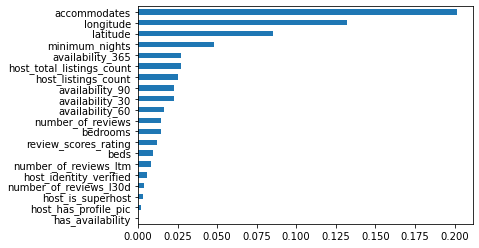

In [38]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)[:20]
feat_importances.sort_values().plot(kind='barh')
plt.show()

### Support Vector Machines Regressor

In [ ]:
svr = SVR(epsilon=5, kernel='linear')
svr.fit(X_train, y_train) 
svrpreds = svr.predict(X_test)

print("R-Square:", r2_score(y_test, svrpreds))
print('MAE:', metrics.mean_absolute_error(y_test, svrpreds))
print('MSE:', metrics.mean_squared_error(y_test, svrpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svrpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, svrpreds))

### K-nearest neighbors (KNN)

RMSE value for k=  0 is: 121.28968155420549
RMSE value for k=  1 is: 105.96989195471728
RMSE value for k=  2 is: 100.83677502664295
RMSE value for k=  3 is: 98.90982401723227
RMSE value for k=  4 is: 98.74550947875173
RMSE value for k=  5 is: 97.91378490792312
RMSE value for k=  6 is: 97.29650888999943
RMSE value for k=  7 is: 97.16232027037026
RMSE value for k=  8 is: 97.11632978699632
RMSE value for k=  9 is: 97.20745893423407
RMSE value for k=  10 is: 97.31238904814218
RMSE value for k=  11 is: 97.45804861356861
RMSE value for k=  12 is: 97.53099130756313
RMSE value for k=  13 is: 97.60420962358889
RMSE value for k=  14 is: 97.67110035503697
RMSE value for k=  15 is: 97.76910073986166
RMSE value for k=  16 is: 97.92479196489892
RMSE value for k=  17 is: 97.99332106136787
RMSE value for k=  18 is: 98.09732373191605
RMSE value for k=  19 is: 98.16470970600221
RMSE value for k=  20 is: 98.2933539559306


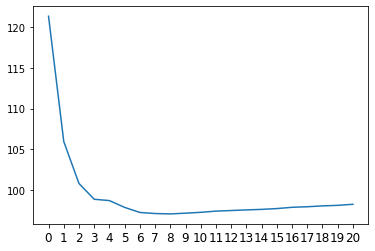

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_x_test=scaler.transform(X_test)
scaled_x_train=scaler.transform(X_train)

rmse_val = [] #to store rmse values for different k
for K in range(1,22):  
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(scaled_x_train, y_train)  #fit the model
    pred=model.predict(scaled_x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K-1 , 'is:', error)

plt.plot(rmse_val)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],fontsize=12)
plt.show()

In [28]:
knnr = KNeighborsRegressor(n_neighbors = 8)
knnr.fit(X_train, y_train)
knnrpreds = knnr.predict(X_test)

print("R-Square:", r2_score(y_test, knnrpreds))
print('MAE:', metrics.mean_absolute_error(y_test, knnrpreds))
print('MSE:', metrics.mean_squared_error(y_test, knnrpreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knnrpreds)))
print('MAPE:', mean_absolute_percentage_error(y_test, knnrpreds))

R-Square: 0.2863266829997514
MAE: 67.19821109123434
MSE: 12377.577213774597
RMSE: 111.254560417875
MAPE: 55.761236865122186


Team is going to pick a random forest to predict price because: 1. better performance, 2. requires little time to optimize it (its default params are often close to be the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables, 3. introduced randomness, avoid overfitting, 4. human readable decision-making

# Comment Analysis

In [29]:
comment_data = pd.read_csv("reviews.csv")
comment_data.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...


In [30]:
comment = comment_data['comments']

In [31]:
# Filter out comments not in English
# -*- coding: utf-8 -*-
def isEnglish(text):
    try:
        text.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return ''
    else:
        return text

# Covert comments to lower cast, remove square bracket, remove numbers and punctuation
def text_cleaning(text):
    text = str(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('  ', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)
    return text


### Vocabulary Extraction And Preprocessing

In [32]:
# to balance efficiency and accuracy
# WordNetLemmatizer() can take a long time
comment = comment.apply(lambda x: text_cleaning(isEnglish(str(x))))
comment

0                                                          
1                                          great experience
2         ive stayed with my friend at the midtown castl...
3         weve been staying here for about nights enjoyi...
4         we had a wonderful stay at jennifers charming ...
                                ...                        
891959                                                     
891960    immaculate unit in a great neighborhood the ap...
891961                                                     
891962    great stay i wasnt sure what i was expecting b...
891963    amazing beach getaway private the pictures don...
Name: comments, Length: 891964, dtype: object

In [33]:
# Apply Bag-of-Words model of all comments in the document
bag = ' '.join(comment).split()

In [34]:
# Remove stopwords and words with length <=2
stop_words = set(stopwords.words('english'))
cleanbag = [w for w in bag if w not in stop_words and len(w) > 2]

In [35]:
# group by words and show frequency
table = pd.DataFrame(cleanbag, columns=['words'])
g = table.groupby('words')
freqs = g.size()
freqs = freqs.sort_values(ascending=False)

In [36]:
# select words with top frequency
topfreqs = freqs[:50]
topfreqs

words
great           406759
place           345497
stay            306073
apartment       218802
clean           210491
location        198959
host            177546
nice            157503
would           144269
room            119040
comfortable     114623
recommend       112899
subway          106794
good            105556
everything      102664
really           98701
close            96641
easy             93678
definitely       90714
perfect          85646
time             83878
well             75309
space            74865
home             73916
also             67613
neighborhood     66991
super            64604
helpful          62043
quiet            59890
amazing          59375
restaurants      57808
get              57155
manhattan        56789
area             55690
nyc              55575
walk             54413
like             53709
friendly         53215
new              52746
bed              51264
wonderful        50860
highly           50784
back             50154
brook

In [37]:
wordfrequency = pd.DataFrame(freqs, columns=['frequency'])
#wordfrequency.to_csv('wordfrequency.csv', index=True)

## Host-side insights
### what words are mentioned in comments? -> What does customers care about?

The house and its enviroment condition: 'clean', 'quite', 'new', 'comfortable'

The house geography condition: 'location'，'subway', 'close', 'restaurants', 'walk'

The host: 'nice', 'helpful'


# How to Increase Reservation Rate

Goal: create recommendations for the low earner/low reservation rate hosts and boost their listings more profitable than before.

Methodology: do features comparison between top performer and low performer.

Definition of Performance: based on top-rank correlation features, create a new feature call performance(high, low). 
Performance is derived from the multiplication of reviews_per_month and review_scores_rating, and the cutoff will be set at top 30%. The Performance feature was created as a way to see which listings have more completed orders and great reviews from guests than others, since we don't have any number of completed orders. Then, we can know what makes top performers top performers, and extract insight for hosts.

In [79]:
pd.set_option('display.max_columns', 200)
listings_perfomance = listing_data.copy()
listings_perfomance['new_score_reviews2'] = listings_perfomance['reviews_per_month'] * listings_perfomance['review_scores_rating']
listings_perfomance['new_score_reviews2'].fillna(0, inplace = True)
listings_perfomance.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,new_score_reviews2
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,skylit midtown castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.0,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,3,33,63,338,2021-12-05,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33,1.5510
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,whole flr wprivate bdrm bath kitchenpls read,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,69%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,3,6,18,194,2021-12-05,409,32,0,2015-01-05,2021-10-22,4.45,4.58,4.49,4.78,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86,21.6270
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,blissartsspace,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Wifi"",...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.

In [84]:
listings_perfomance.shape

(27264, 75)

In [83]:
# minimum unit of rental is 1 day, so reviews_per_month > 30 is unreasonable
listings_perfomance = listings_perfomance[listings_perfomance['reviews_per_month']<30]

# only consider about listings that has availability
listings_perfomance = listings_perfomance[listings_perfomance['has_availability']=='t']

In [85]:
# cleasing helper functions
def persent_str_to_float(x):
    if type(x)==str:
        x = x.replace('%','')
        x = float(x)/100.0
    return x

# change host_response_time columns from string into numerical
def change_to_time(x):
    if x == 'within an hour':
        x='1'
    elif x == 'within a few hours':
        x='4'
    elif x == 'within a day':
        x='24'
    elif x == 'a few days or more':
        x='48'
    else:
        x='96'    
    return x

# change host_response_time columns back to string 
def change_to_str(x):
    if x == 1:
        x='within an hour'
    elif x == 4:
        x='within a few hours'
    elif x == 24:
        x='within a day'
    elif x == 48:
        x= 'a few days or more'
    elif x == 96:
        x= 'Not Response'      
    return x

# Set the bins for the score-range.
def rangeScore(x):
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value

# classified high/low performance
top80 = listings_perfomance['new_score_reviews2'].quantile(0.80)
bot20 = listings_perfomance['new_score_reviews2'].quantile(0.20)
def top(x):
    if(x>top80):
        return 1
    else:
        return 0   
def bot(x):
    if(x<bot20):
        return 1
    else:
        return 0
# Convert the Amenities column into more analytical words
def createAmenities(x):
    val = x.replace('{','').replace('}','').replace('"','').replace(' ','_').replace(',',' ')
    val = val.split()
    return val

# Convert text-based bathroom info into numerical
def bath(x):
    if x == 'Shared half-bath' or 'Private half-bath' or 'Half-bath':
        return 0.5
    else:
        return x.str.split().str[0].astype(float)

# Convert boolean t/f into 1/0
def boolean_to_int(x):
    if (x=='t'):
        return 1
    else:
        return 0

In [86]:
listings_perfomance['host_response_time'] = listings_perfomance['host_response_time'].apply(change_to_time)
listings_perfomance['score_ranges'] = listings_perfomance['new_score_reviews2'].apply(rangeScore)
listings_perfomance['host_acceptance_rate'] = listings_perfomance['host_acceptance_rate'].apply(persent_str_to_float)
listings_perfomance['host_response_rate'] = listings_perfomance['host_response_rate'].apply(persent_str_to_float)
listings_perfomance['host_is_superhost'] = listings_perfomance['host_is_superhost'].apply(boolean_to_int)
listings_perfomance['host_has_profile_pic'] = listings_perfomance['host_has_profile_pic'].apply(boolean_to_int)
listings_perfomance['host_identity_verified'] = listings_perfomance['host_identity_verified'].apply(boolean_to_int)
listings_perfomance['instant_bookable'] = listings_perfomance['instant_bookable'].apply(boolean_to_int)
#listings_perfomance['bathrooms'] = listings_perfomance['bathrooms_text'].apply(bath)
#listings_perfomance['amenities'] = listings_perfomance['amenities'].apply(createAmenities)
listings_perfomance['top90'] = listings_perfomance['new_score_reviews2'].apply(top)
listings_perfomance['bot50'] = listings_perfomance['new_score_reviews2'].apply(bot)

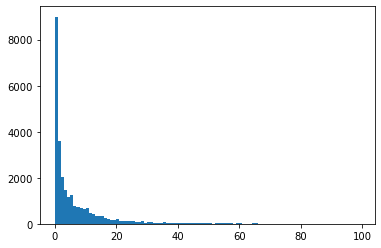

In [87]:
plt.hist(listings_perfomance['new_score_reviews2'],bins=range(0, 100, 1))
plt.show()

In [88]:
# drop some irrelevant colmuns
irrelevant_colmuns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 
                      'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 
                      'host_since', 'host_location', 'host_about','host_thumbnail_url', 'host_picture_url',
                      'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
                      'host_verifications','neighbourhood', 'neighbourhood_cleansed', 
                      'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type',
                      'bathrooms_text','price', 'minimum_nights', 'maximum_nights', 
                      'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                      'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                      'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 
                      'availability_90', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 
                      'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 
                      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                      'license','calculated_host_listings_count', 
                      'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                      'calculated_host_listings_count_shared_rooms', 'reviews_per_month','amenities',
                      'bathrooms','bedrooms','beds']

In [89]:
listings_perfomance.drop(irrelevant_colmuns,axis=1,inplace=True)
listings_perfomance.drop('score_ranges',axis=1,inplace=True)
listings_perfomance

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,availability_365,instant_bookable,new_score_reviews2,top90,bot50
0,24,0.80,0.17,0,1,1,1,338,0,1.5510,0,0
1,48,0.09,0.69,0,1,1,3,194,0,21.6270,1,0
2,1,1.00,1.00,0,1,1,2,365,0,2.3504,0,0
3,24,1.00,0.25,0,1,1,4,123,0,0.1000,0,1
4,24,1.00,1.00,0,1,0,2,192,0,15.4928,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38020,1,1.00,0.75,0,1,1,2,159,1,5.0000,0,0
38021,1,1.00,1.00,0,1,1,2,352,1,5.0000,0,0
38164,1,0.99,0.99,1,1,1,2,364,1,1.0000,0,0
38168,1,0.90,1.00,1,1,1,3,68,0,5.0000,0,0


<AxesSubplot:>

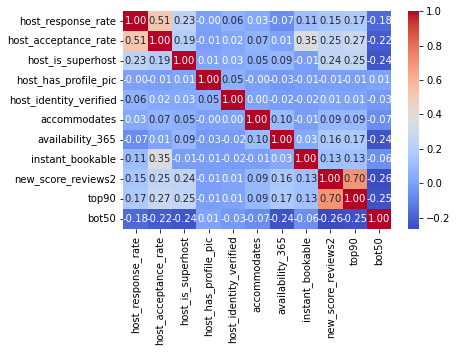

In [90]:
sns.heatmap(listings_perfomance.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In the above heat map, the focus is on the parameters that are positively correlated with top 90% performance and negatively correlated with bottom 50% performance. We have:

1. host_response_time

2. host_response_rate	

3. host_acceptance_rate	

4. host_is_superhost

5. availability_365 

6. host_identity_verified

7. instant_bookable

meet the need.

In [91]:
### defide them into 2 dataframe class
top_listings = listings_perfomance[listings_perfomance['new_score_reviews2'] >= top80]
low_listings = listings_perfomance[listings_perfomance['new_score_reviews2'] <= bot20]

### Host Acceptance Rate DataFrame

hostAR_top_performer = pd.DataFrame(top_listings['host_acceptance_rate'].reset_index(drop = True))
hostAR_top_performer['status'] = 'Top Performer'

hostAR_low_performer = pd.DataFrame(low_listings['host_acceptance_rate'].reset_index(drop = True))
hostAR_low_performer['status'] = 'Low Performer'

hostAR = hostAR_low_performer.append(hostAR_top_performer).sample(frac=1)
host_acceptance_rate_fig = hostAR[hostAR['host_acceptance_rate'].isin([1.0, 0.99, 0.98, 0.95,0.0])]
### Identity verified.

identify_verified_top = pd.DataFrame(top_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_top['status'] = 'Top Performer'

identify_verified_low = pd.DataFrame(low_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_low['status'] = 'Low Performer'

identify_verified = identify_verified_low.append(identify_verified_top).sample(frac=1)

### Host is Superhost DataFrame

superhost_top_performer = pd.DataFrame(top_listings['host_is_superhost'].reset_index(drop = True))
superhost_top_performer['status'] = 'Top Performer'

superhost_low_performer = pd.DataFrame(low_listings['host_is_superhost'].reset_index(drop = True))
superhost_low_performer['status'] = 'Low Performer'

superhost = superhost_top_performer.append(superhost_low_performer).sample(frac=1)

### instant bookable

instantBookable_top_performer = pd.DataFrame(top_listings['instant_bookable'].reset_index(drop = True))
instantBookable_top_performer['status'] = 'Top Performer'

instantBookable_low_performer = pd.DataFrame(low_listings['instant_bookable'].reset_index(drop = True))
instantBookable_low_performer['status'] = 'Low Performer'

host_bookable = instantBookable_low_performer.append(instantBookable_top_performer).sample(frac=1)

### Host response Rate.

top_listings['host_response_time_str'] = top_listings['host_response_time'].apply(change_to_str)
low_listings['host_response_time_str'] = low_listings['host_response_time'].apply(change_to_str)

host_response_top = pd.DataFrame(top_listings['host_response_time_str'].reset_index(drop = True))
host_response_top['status'] = 'Top Performer'

host_response_low = pd.DataFrame(low_listings['host_response_time_str'].reset_index(drop = True))
host_response_low['status'] = 'Low Performer'

host_response = host_response_low.append(host_response_top).sample(frac=1)

### **Host Response time.**

host_responserate_top_performer = pd.DataFrame(top_listings['host_response_rate'].reset_index(drop = True))
host_responserate_top_performer['status'] = 'Top Performer'

host_responserate_low_performer = pd.DataFrame(low_listings['host_response_rate'].reset_index(drop = True))
host_responserate_low_performer['status'] = 'Low Performer'

host_responserate = host_responserate_low_performer.append(host_responserate_top_performer).sample(frac=1)
# ---
percentage_low = list(host_responserate[host_responserate['status'] == 'Low Performer']['host_response_rate'].unique())
percentage_low.sort(reverse = True)
percentage_top = list(host_responserate[host_responserate['status'] == 'Top Performer']['host_response_rate'].unique())
percentage_top.sort(reverse = True)
host_responserate_fig = host_responserate[host_responserate['host_response_rate'].isin([1.0, 0.99, 0.96, 0.95, 0.94, 0.0])]


In [92]:
### collecting data into one array ###
data= []
data.append(host_acceptance_rate_fig)
data.append(identify_verified)
data.append(superhost)
data.append(host_bookable)
data.append(host_response)
data.append(host_responserate_fig)

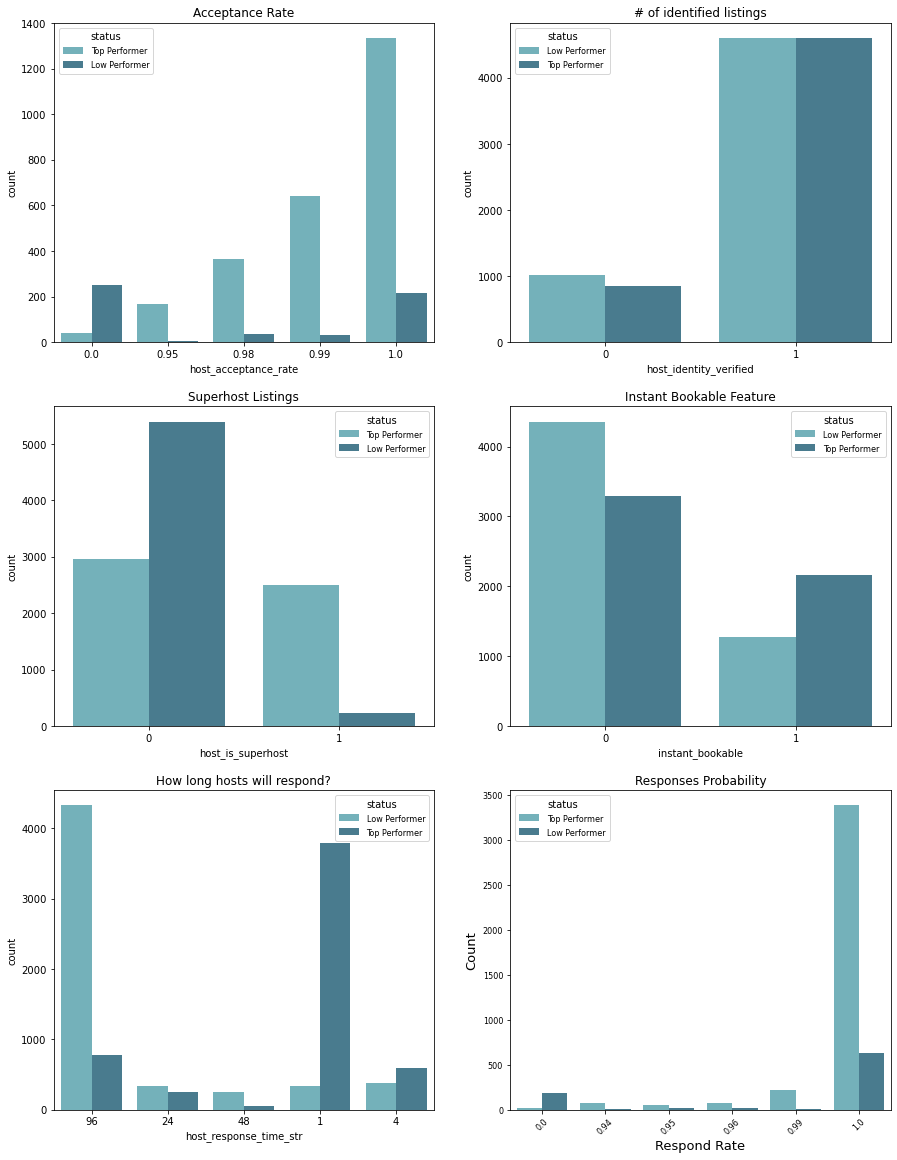

In [93]:
### Vis 

fig, ax = plt.subplots(figsize=(15,20), nrows=3, ncols=2)
x_data= ['host_acceptance_rate','host_identity_verified','host_is_superhost','instant_bookable','host_response_time_str','host_response_rate']
title= ['Acceptance Rate','# of identified listings','Superhost Listings', 'Instant Bookable Feature', 'How long hosts will respond?' , 'Responses Probability']

x_axis= ['Percentage','Activate/Not','True/Not','Activate/Not', 'Respond Time', 'Respond Rate']
y_axis= ['Count']
cnt=0

for x in range(3):
    for y in range(2):
        
        ax[x][y].set_title(title[cnt], fontsize=12)
        sns.countplot(x=x_data[cnt], hue='status', data=data[cnt], palette='GnBu_d', orient='h', ax=ax[x][y])
        plt.setp(ax[x][y].get_legend().get_texts(), fontsize='8') # for legend text
        plt.setp(ax[x][y].get_legend().get_title(), fontsize='10') # for legend title
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.xlabel(x_axis[cnt], fontsize=13)
        p=plt.ylabel(y_axis[0], fontsize=13)
        
        cnt+=1

# Interpretation

1. **Respond in a shorter time.** An important reason for Low Perfomance is that the host does not reply to messages, which inevitably leads to unsuccessful bookings. The proportion of host who responding within one hour, top performer is overwhelming. As a user, it is likely that more than one room will be browsed.Being the first to establish communication with users is likely to give you an edge over the competition, resulting in higher booking rates.

2. **Increase acceptance rate of booking.** Top Perfomance accept almost every orders. Many users do not choose to wait for a long time for a response if the room is not an essential choice. This is because they run the risk that other preferred rooms will be booked in the meantime. Therefore， active instant bookable to be more competetive and to give better experience

3. **Be the Superhost.** Top Perfomance hosts are more likely to be superhosts. More efficient responses and friendlier hosts can be expected from this kind of certification from Airbnb, and users have more confidence in getting a better experience from them.


